In [102]:
#@title Librerias

import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicHermiteSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica
from numpy.polynomial.polynomial import Polynomial

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:* Leonardo Ortega Trujillo

*Identificación:* 1001 132 197

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



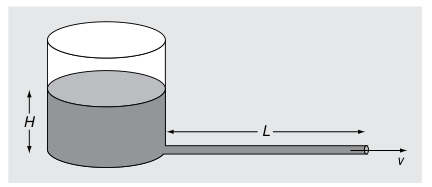

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


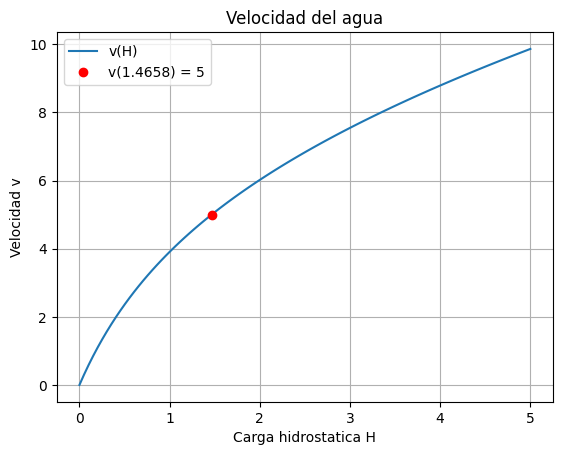

In [103]:
#a)
g = 9.81
L = 4
t_25 = 2.5
def v(H,g,L,t):
   return (np.sqrt(2*g*H)) * np.tanh(((np.sqrt(2*g*H)) / (2*L)) * t_25)

#c)
#planteamos una ecuacion para usar metodo de raíces

def ecuacion_H(H):
  return v(H,g,L,t_25) - 5

H_value = fsolve(ecuacion_H,3)[0] #se supone el numero 3 para realizar la aproximacino inicial y así resolver v(H) - 5 = 0

#b)
H = np.linspace(0,5,100)
plt.plot(H,v(H,g,L,t_25), label = 'v(H)')
plt.plot(H_value,v(H_value,g,L,t_25),'ro',label = 'v(1.4658) = 5')
plt.xlabel('Carga hidrostatica H')
plt.ylabel('Velocidad v')
plt.title('Velocidad del agua')
plt.legend()
plt.grid()
plt.show()

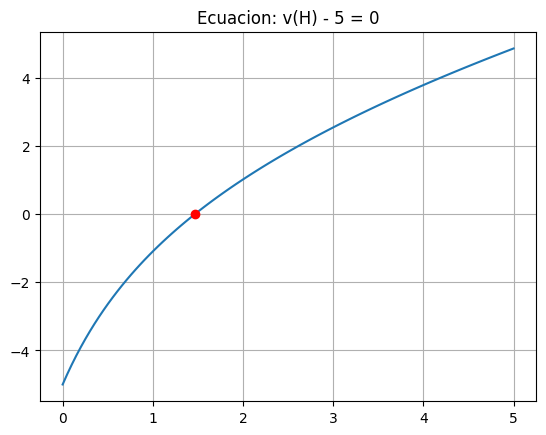

Raíz usando bisección: 1.465894639492035
Raíz usando fsolve: 1.4658945884767882


In [104]:
#d)
def biseccion(f,a,b,tol = 1e-7):
  while (b-a)/2 > tol:
    c = (a + b)/2

    if f(c) == 0:
      return c

    if f(a)*f(c) < 0:
      b = c
    else:
      a = c

  return (a + b)/2

#verificamos la nueva ecuacion
plt.plot(H,ecuacion_H(H))
plt.title('Ecuacion: v(H) - 5 = 0')
plt.plot(raiz_bisec,ecuacion_H(raiz_bisec),'ro')
plt.grid()
plt.show()

#encontramos la raíz usando biseccion:
a,b = 1,2
raiz_bisec = biseccion(ecuacion_H,a,b)
print(f'Raíz usando bisección: {raiz_bisec}\nRaíz usando fsolve: {H_value}')

In [105]:
#e) haciendo uso de newton() para encontrar la raiz v(H) - 5 = 0
h = sp.symbols('h')
v_simbolica = (sp.sqrt(2*g*h)) * sp.tanh(((sp.sqrt(2*g*h)) / (2*L)) * t_25) - 5
v_sim_prime = sp.diff(v_simbolica,h)
v_prime = sp.lambdify(h,v_sim_prime)

x0 = 0.5

root = newton(ecuacion_H, x0,v_prime)
root

1.465894588476788

# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




In [106]:
# Aqui va su código
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
#a)

def diff_finitas(x,y):
  n = len(x)
  derivada = np.zeros_like(x, dtype = 'float')
  derivada[0] = (y[1] - y[0]) / (x[1] - x[0])
  derivada[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])

  for i in range(1,n-1):
      derivada[i] = (y[i+1] - y[i-1]) / (2*(x[i+1] - x[i-1]))

  return derivada

c_prime = diff_finitas(t,c)

c_prime_gradiente = np.gradient(c,t)

error = np.abs(c_prime - c_prime_gradiente)
#b)
print(f'Valores con diff. finitas: {c_prime}\nValores con np.gradient(): {c_prime_gradiente}\nError entre cada valor: {error}')

Valores con diff. finitas: [-0.104   -0.04425 -0.03125 -0.022   -0.0155  -0.026  ]
Valores con np.gradient(): [-0.104  -0.0885 -0.0625 -0.044  -0.031  -0.026 ]
Error entre cada valor: [0.      0.04425 0.03125 0.022   0.0155  0.     ]


In [128]:
#c)linealizacion
dc_dt_lineal = np.log(-c_prime)
c_log = np.log(c)

slope, intercept, r_value, p_value, std_err = linregress(c_log[1:-1], dc_dt_lineal[1:-1])
n = slope
k = np.exp(intercept)
print(f'Los valores para n y k son respectivamente :{n}, {k}')

Los valores para n y k son respectivamente :1.0008081654865986, 0.017844983523232424


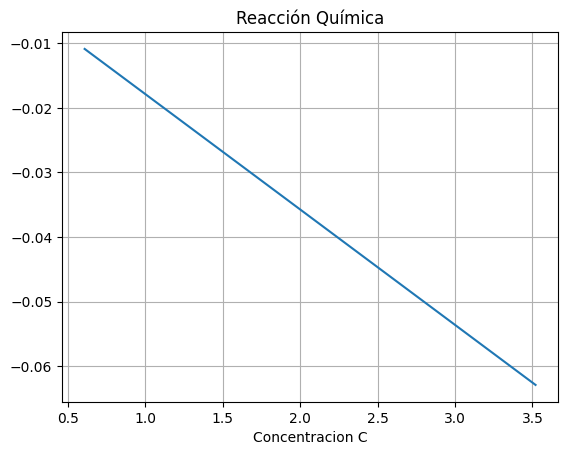

El error máximo es: 0.015118907624229455


In [137]:
#d)
def dc_dt(c,k,n):

  return -(k * c**n)

t_plot_c = np.linspace(min(t),max(t),100)
c_plot = np.linspace(3.52,0.61,100)

valores_dc_dt = dc_dt(c,k,n)
error_dc_dt_max = np.abs(max(valores_dc_dt) - max(c_prime_gradiente))


plt.plot(c_plot,dc_dt(c_plot,k,n))
plt.title('Reacción Química')
plt.xlabel('Concentracion C')
plt.grid()
plt.show()
print(f'El error máximo es: {error_dc_dt_max}')

# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




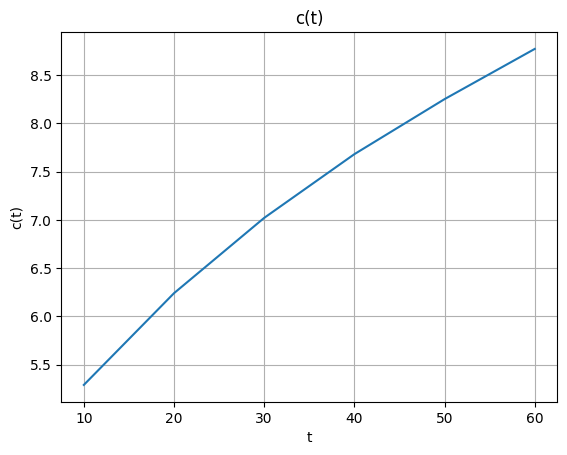

In [108]:
#a)
c_2 = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])

plt.plot(t,c_2)
plt.title('c(t)')
plt.xlabel('t')
plt.ylabel('c(t)')
plt.grid()
plt.show()

In [109]:
#b)
c_poly_lagrange = lagrange(t,c)
c_poly_hermite =  CubicHermiteSpline(t,c,c_prime_gradiente)

poly_coef = Polynomial(c_poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
derivative

Polynomial([-1.92950000e-01,  8.80833333e-03, -2.40000000e-04,  3.83333333e-06,
       -2.50000000e-08], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

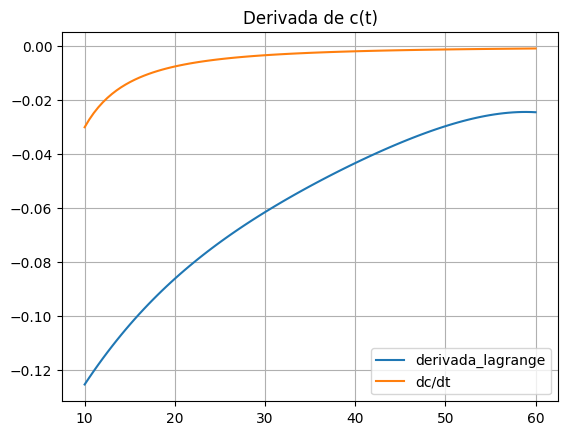

In [110]:
def dc_dt(c):
  k,n = 3,-2
  return -(k * c**n)

t_plot = np.linspace(min(t),max(t),100)

plt.plot(t_plot,derivative(t_plot),label = 'derivada_lagrange')
plt.plot(t_plot,dc_dt(t_plot),label = 'dc/dt')
plt.title('Derivada de c(t)')
plt.legend()
plt.grid()
plt.show()

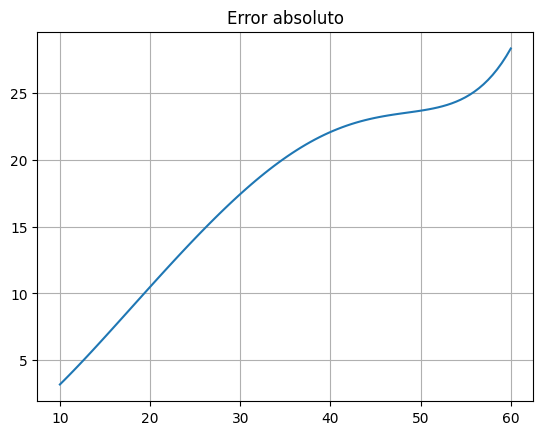

In [111]:
error_abs = np.abs((derivative(t_plot) - dc_dt(t_plot)) / dc_dt(t_plot))

plt.plot(t_plot,error_abs)
plt.title('Error absoluto')
plt.grid()
plt.show()
#se observa que a medida que el valor de t aumenta, el error lo hace igualmente